<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#upsampling" data-toc-modified-id="upsampling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>upsampling</a></span></li><li><span><a href="#downsampling" data-toc-modified-id="downsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>downsampling</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Так как задача состоит в том, чтобы мы предсказали уйдет ли клиент или нет, то перед нами стоит задача классификации

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

df = pd.read_csv('/datasets/Churn.csv')

In [2]:
display(df)
df.info()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Для начала, названия столбцов переведем в змеиный регистр для лучшей читабельности. 
Далее, как можно заметить, в столбце Tenure 909 строк с NaN. Для упрощения дальнейшей работы, удалим их.
Также, стоит изменить тип стобца tenure с float на int, потому что в этом стобце нет значений, которым не подошел бы int (float здесь не нужен)

In [3]:
df.columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography', 'gender', 'age', \
              'tenure', 'balance', 'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary', 'exited']

df.dropna(subset=['tenure'], inplace=True)
df['tenure'] = df['tenure'].astype(int)
display(df)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [4]:

features = df.drop(['row_number', 'customer_id', 'surname', 'exited'], axis=1) 
target = df['exited']
features['geography'] = features['geography'].str.lower()
features['gender'] = features['gender'].str.lower()

features = pd.get_dummies(features, drop_first=True)

features_train, features_valid, target_train, target_valid = train_test_split(features, target, \
                                                                              test_size=0.20, random_state=12345)
features_train, features_test, target_train, target_test = train_test_split(features_train, target_train, \
                                                                            test_size=0.25, random_state=12345)

print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)
print(target_train.shape)
print(target_valid.shape)
target_test.shape



(5454, 11)
(1819, 11)
(1818, 11)
(5454,)
(1819,)


(1818,)

Выделяем feature и target для дальнейших тренировок моделей. Соотношение буде 3:1:1 (тренировочная выборка:валидационная:тестовая). Стобцы 'row_number', 'customer_id', 'surname' нам для тренировки модели не нужны, поэтому добавлять их во features нет смысла.

Проверяем верно ли всё разбили путем беглого осмотра features и target.

In [5]:
display(features)
display(target)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9994,800,29,2,0.00,2,0,0,167773.55,0,0,0
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0


0       1
1       0
2       1
3       0
4       0
       ..
9994    0
9995    0
9996    0
9997    1
9998    1
Name: exited, Length: 9091, dtype: int64

## Исследование задачи

In [6]:
print('Кол-во объектов класса 1 =', target[target == 1].count())
print('Кол-во объектов класса 0 =', target[target == 0].count())

Кол-во объектов класса 1 = 1854
Кол-во объектов класса 0 = 7237


В датафрейме 20% объектов класса 1 и 80% объектов класса 0.
Таким образом, мы наблюдаем дисбаланс классов в нашем датафрейме

Также, в выборке наблюдается сильный разброс значений между признаками. Для исправления данного факта воспользуемся масштабированием признаков

In [7]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary', 'num_of_products']
pd.options.mode.chained_assignment = None

scaler = StandardScaler()

features_train[numeric] = scaler.fit_transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

display(features_train)
display(features_valid)
features_test

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
3706,-0.203819,0.471273,0.352316,0.786022,0.782369,0,0,-0.357205,0,1,0
6805,-0.357513,-0.384930,-1.373506,-1.230577,0.782369,1,1,-1.671048,0,0,0
4449,0.175290,-0.289797,-0.683177,-1.230577,0.782369,1,0,-1.119181,0,0,1
598,0.349476,1.708010,0.007151,1.379462,-0.914942,0,0,-1.569064,1,0,0
1845,0.902771,-0.289797,1.387809,-1.230577,-0.914942,0,1,1.543790,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
8706,2.060592,1.517743,0.697480,-1.230577,-0.914942,0,0,1.250491,0,1,0
113,0.267506,-0.289797,1.387809,0.475571,-0.914942,0,1,-1.330155,0,1,1
4961,0.410953,0.566406,-1.718671,0.860859,0.782369,1,0,0.887832,1,0,1
2403,-0.080865,-1.241133,-0.338013,0.240309,0.782369,0,1,-1.240594,0,0,0


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
862,0.779816,0.185872,0.697480,0.600726,-0.914942,1,1,0.295405,0,0,1
9727,-1.218194,0.566406,-1.373506,-1.230577,-0.914942,0,1,1.578362,0,0,0
1717,0.595385,-0.384930,-0.683177,-0.319996,-0.914942,1,0,-1.417009,0,1,0
8640,0.831047,-0.670331,1.387809,0.820545,-0.914942,0,0,-0.672521,0,0,0
5288,-0.685391,-0.860599,-1.028342,-1.230577,0.782369,1,1,0.561255,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7697,-0.490713,0.185872,-0.683177,-1.230577,0.782369,1,0,-0.786362,0,1,0
8323,0.646616,-0.860599,0.352316,-1.230577,0.782369,1,0,0.914921,0,1,0
3900,1.640498,-0.289797,1.387809,-0.123866,0.782369,0,1,0.164105,0,0,1
5474,0.021597,-0.480064,1.387809,-1.230577,0.782369,1,0,0.666789,0,0,0


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
4799,-1.003024,1.232342,-1.373506,-1.230577,-0.914942,0,0,-0.626048,0,0,1
396,-0.941546,-0.575198,-0.683177,-0.354876,-0.914942,1,1,-1.722595,0,0,1
5144,-1.679273,-1.336267,-0.683177,0.929889,-0.914942,1,1,0.235764,0,0,0
9723,-1.259179,-0.670331,0.697480,0.786457,-0.914942,0,0,-0.223572,0,0,1
1999,-0.162835,0.376139,-0.683177,1.085690,-0.914942,1,1,1.022964,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6810,-1.054255,0.281005,1.387809,0.156826,0.782369,1,0,-0.733674,1,0,0
9462,1.548282,0.661540,0.352316,-1.230577,0.782369,1,0,1.253356,0,1,0
546,-0.634160,-0.099529,-1.718671,-1.230577,0.782369,1,0,-0.906551,0,0,1
4694,-1.320656,0.566406,0.697480,0.488946,-0.914942,1,0,-1.158256,0,1,1


Выполнили масштабирование, не забыли про дамми-ловушку, проверяем что получилось и идем дальше

**Модель: логистическая регрессия**

In [8]:
%%time
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

predictions = model.predict(features_valid)

CPU times: user 20.7 ms, sys: 8.18 ms, total: 28.9 ms
Wall time: 40.6 ms


Значение F1-меры: 0.329938900203666 

Значение AUC-ROC метрики: 0.7882347444164097


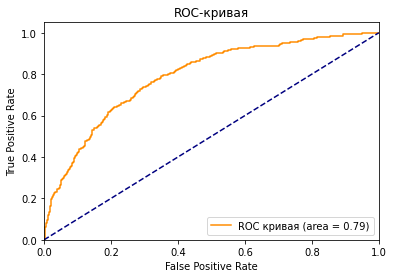

In [9]:
probabilities = model.predict_proba(features_valid)
probabilities = probabilities[:,1]

print('Значение F1-меры:', f1_score(target_valid, predictions), '\n')
print('Значение AUC-ROC метрики:', roc_auc_score(target_valid, probabilities))


fpr, tpr, treshold = roc_curve(target_valid, probabilities)
roc_auc = auc(fpr, tpr)

# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

Значение F1-меры очень маленькое, такая модель нам не подходит

**Модель: решающее дерево**

In [10]:
%%time
best_f1_score = 0
for depth in range(1,16):
    model = DecisionTreeClassifier(random_state=12345, criterion='gini', max_depth=depth)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    if f1_score(target_valid, predictions) > best_f1_score:
        best_f1_score = f1_score(target_valid, predictions)
        best_depth = depth

CPU times: user 311 ms, sys: 598 µs, total: 312 ms
Wall time: 322 ms


In [11]:
%%time
model = DecisionTreeClassifier(random_state=12345, criterion='gini', max_depth=best_depth)
model.fit(features_train, target_train)

predictions = model.predict(features_valid)

CPU times: user 32.5 ms, sys: 108 µs, total: 32.6 ms
Wall time: 37.6 ms


Значение F1-меры для лучшей модели решающего дерева: 0.5942684766214177 

Значение AUC-ROC метрики для лучшей модели решающего дерева: 0.8037790860667227 

Лучшая глубина: 9


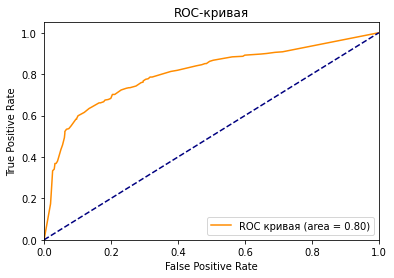

In [12]:
probabilities = model.predict_proba(features_valid)
probabilities = probabilities[:,1]

print('Значение F1-меры для лучшей модели решающего дерева:', f1_score(target_valid, predictions), '\n')
print('Значение AUC-ROC метрики для лучшей модели решающего дерева:', roc_auc_score(target_valid, probabilities), '\n')
print('Лучшая глубина:', best_depth)

fpr, tpr, treshold = roc_curve(target_valid, probabilities)
roc_auc = auc(fpr, tpr)

# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

Здесь ситуация лучше, но для успешного прохождения тестовой выборки, F1 на валидационной выборке должен быть побольше, чем предельное значение 

**Модель: случайный лес**

In [13]:
%%time
best_depth = 0
best_n = 0
best_f1_score = 0
for depth in range(1,16):
    model = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=depth)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    if f1_score(target_valid, predictions) > best_f1_score:
        best_f1_score = f1_score(target_valid, predictions)
        best_depth = depth

for n in range(1,100):
    model = RandomForestClassifier(random_state=12345, n_estimators=n, max_depth=best_depth)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    if f1_score(target_valid, predictions) > best_f1_score:
        best_f1_score = f1_score(target_valid, predictions)
        best_n = n

CPU times: user 35.3 s, sys: 150 ms, total: 35.5 s
Wall time: 36.7 s


In [14]:
%%time 
model = RandomForestClassifier(random_state=12345, n_estimators=best_n, max_depth=best_depth)
model.fit(features_train, target_train)

predictions = model.predict(features_valid)

CPU times: user 280 ms, sys: 4.09 ms, total: 284 ms
Wall time: 288 ms


Значение F1-меры для лучшей модели случайного леса: 0.5664335664335663 

Значение AUC-ROC метрики для лучшей модели случайного леса: 0.8547986169516868 

Лучшая глубина: 12
Лучший размер леса: 38


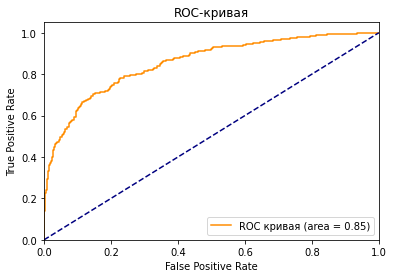

In [15]:
probabilities = model.predict_proba(features_valid)
probabilities = probabilities[:,1]

print('Значение F1-меры для лучшей модели случайного леса:', f1_score(target_valid, predictions), '\n')
print('Значение AUC-ROC метрики для лучшей модели случайного леса:', roc_auc_score(target_valid, probabilities), '\n')
print('Лучшая глубина:', best_depth)
print('Лучший размер леса:', best_n)

fpr, tpr, treshold = roc_curve(target_valid, probabilities)
roc_auc = auc(fpr, tpr)

# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

Результат меньше 0.59, всё еще слишком мало

Обучая модель с несбалансированными классами, мы получаем очень плохие результаты, что является вполне логичным, ведь модели попросту не хватате примеров положительных классов, чтобы нормально обучиться.

## Борьба с дисбалансом

В первую очередь поверим данные, может быть у нас большое кол-во дубликатов и поэтому происходит перевес в сторону отрицательного класса

In [16]:
df.duplicated().sum()

0

Дубликатов нет, значит воспользуемся поочередно upsampling-ом и downsampling-ом.

### upsampling

In [17]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled


print('Кол-во объектов класса 1 до апсэмплинга =', target_train[target_train == 1].count())
print('Кол-во объектов класса 0 до апсэмплинга =', target_train[target_train == 0].count())

features_train_up, target_train_up = upsample(features_train, target_train, 3)

print('Кол-во объектов класса 1 после апсэмплинга =', target_train_up[target_train_up == 1].count())
print('Кол-во объектов класса 0 после апсэмплинга =', target_train_up[target_train_up == 0].count())

Кол-во объектов класса 1 до апсэмплинга = 1119
Кол-во объектов класса 0 до апсэмплинга = 4335
Кол-во объектов класса 1 после апсэмплинга = 3357
Кол-во объектов класса 0 после апсэмплинга = 4335


Я выбрал число repeat=3, потому что при 4 создается перевес уже в сторону не отрицательного класса, а положительного. 

**Модель: логистическая регрессия**

In [18]:
%%time
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train_up, target_train_up)

predictions = model.predict(features_valid)

CPU times: user 34 ms, sys: 40.1 ms, total: 74.1 ms
Wall time: 29 ms


Значение F1-меры: 0.5155350978135789 

Значение AUC-ROC метрики: 0.7883450144846276


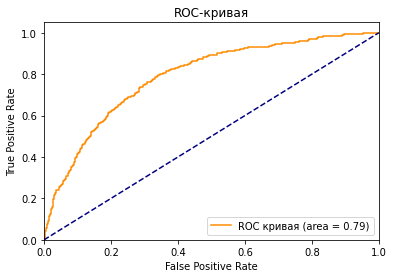

In [19]:
probabilities = model.predict_proba(features_valid)
probabilities = probabilities[:,1]

print('Значение F1-меры:', f1_score(target_valid, predictions), '\n')
print('Значение AUC-ROC метрики:', roc_auc_score(target_valid, probabilities))


fpr, tpr, treshold = roc_curve(target_valid, probabilities)
roc_auc = auc(fpr, tpr)

# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

F1 модели линейной регрессии после upsampling-а значительно выбор, но все еще не дотягивает до минимально допустимого

**Модель: решающее дерево**

In [20]:
%%time
best_f1_score = 0
for depth in range(1,16):
    model = DecisionTreeClassifier(random_state=12345, criterion='gini', max_depth=depth)
    model.fit(features_train_up, target_train_up)
    predictions = model.predict(features_valid)
    if f1_score(target_valid, predictions) > best_f1_score:
        best_f1_score = f1_score(target_valid, predictions)
        best_depth = depth

CPU times: user 391 ms, sys: 0 ns, total: 391 ms
Wall time: 397 ms


In [21]:
%%time
model = DecisionTreeClassifier(random_state=12345, criterion='gini', max_depth=best_depth)
model.fit(features_train_up, target_train_up)

predictions = model.predict(features_valid)

CPU times: user 23 ms, sys: 0 ns, total: 23 ms
Wall time: 21.5 ms


Значение F1-меры для лучшей модели решающего дерева: 0.5930521091811414 

Значение AUC-ROC метрики для лучшей модели решающего дерева: 0.8278385197645081 

Лучшая глубина: 5


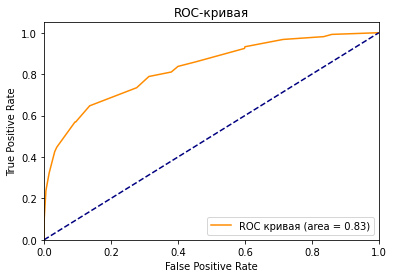

In [22]:
probabilities = model.predict_proba(features_valid)
probabilities = probabilities[:,1]

print('Значение F1-меры для лучшей модели решающего дерева:', f1_score(target_valid, predictions), '\n')
print('Значение AUC-ROC метрики для лучшей модели решающего дерева:', roc_auc_score(target_valid, probabilities), '\n')
print('Лучшая глубина:', best_depth)

fpr, tpr, treshold = roc_curve(target_valid, probabilities)
roc_auc = auc(fpr, tpr)

# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

Неплохой результат, но все еще маловато

**Модель: случайный лес**

In [23]:
%%time
best_depth = 0
best_n = 0
best_f1_score = 0
for depth in range(1,16):
    model = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=depth)
    model.fit(features_train_up, target_train_up)
    predictions = model.predict(features_valid)
    if f1_score(target_valid, predictions) > best_f1_score:
        best_f1_score = f1_score(target_valid, predictions)
        best_depth = depth

for n in range(1,101):
    model = RandomForestClassifier(random_state=12345, n_estimators=n, max_depth=best_depth)
    model.fit(features_train_up, target_train_up)
    predictions = model.predict(features_valid)
    if f1_score(target_valid, predictions) > best_f1_score:
        best_f1_score = f1_score(target_valid, predictions)
        best_n = n

CPU times: user 28.8 s, sys: 124 ms, total: 29 s
Wall time: 29 s


In [24]:
%%time 
model = RandomForestClassifier(random_state=12345, n_estimators=best_n, max_depth=best_depth)
model.fit(features_train_up, target_train_up)

predictions = model.predict(features_valid)

CPU times: user 137 ms, sys: 0 ns, total: 137 ms
Wall time: 140 ms


Значение F1-меры для лучшей модели случайного леса: 0.6430517711171663 

Значение AUC-ROC метрики для лучшей модели случайного леса: 0.8610578450612092 

Лучшая глубина: 5
Лучший размер леса: 23


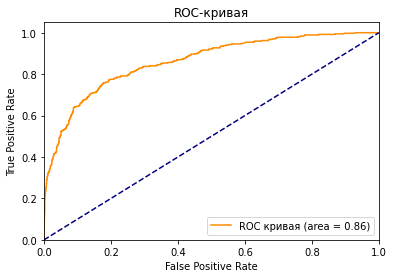

In [25]:
probabilities = model.predict_proba(features_valid)
probabilities = probabilities[:,1]

print('Значение F1-меры для лучшей модели случайного леса:', f1_score(target_valid, predictions), '\n')
print('Значение AUC-ROC метрики для лучшей модели случайного леса:', roc_auc_score(target_valid, probabilities), '\n')
print('Лучшая глубина:', best_depth)
print('Лучший размер леса:', best_n)

fpr, tpr, treshold = roc_curve(target_valid, probabilities)
roc_auc = auc(fpr, tpr)

# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

А вот у модели случайного леса отличный F1 показатель, да и AUC-ROC тоже очень высокий, эту модель можно протестировать на тестовой выборке  

### downsampling

In [26]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
    [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    
    target_downsampled = pd.concat(
    [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
    features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

print('Кол-во объектов класса 1 до downсэмплинга =', target_train[target_train == 1].count())
print('Кол-во объектов класса 0 до downсэмплинга =', target_train[target_train == 0].count())

features_train_down, target_train_down = downsample(features_train, target_train, 0.3)

print('Кол-во объектов класса 1 после downсэмплинга =', target_train_down[target_train_down == 1].count())
print('Кол-во объектов класса 0 после downсэмплинга =', target_train_down[target_train_down == 0].count())

Кол-во объектов класса 1 до downсэмплинга = 1119
Кол-во объектов класса 0 до downсэмплинга = 4335
Кол-во объектов класса 1 после downсэмплинга = 1119
Кол-во объектов класса 0 после downсэмплинга = 1300


Использую значение frac = 0.3 по тем же причинам, что и при upsampling-е

**Модель: логистическая регрессия**

In [27]:
%%time
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train_down, target_train_down)

predictions = model.predict(features_valid)

CPU times: user 35.3 ms, sys: 96 ms, total: 131 ms
Wall time: 90.9 ms


Значение F1-меры: 0.5120350109409191 

Значение AUC-ROC метрики: 0.7887244182786655


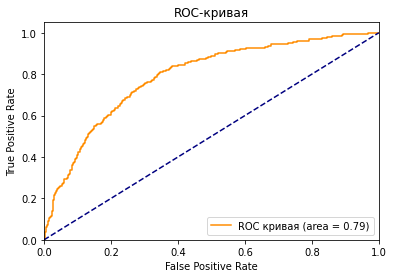

In [28]:
probabilities = model.predict_proba(features_valid)
probabilities = probabilities[:,1]

print('Значение F1-меры:', f1_score(target_valid, predictions), '\n')
print('Значение AUC-ROC метрики:', roc_auc_score(target_valid, probabilities))


fpr, tpr, treshold = roc_curve(target_valid, probabilities)
roc_auc = auc(fpr, tpr)

# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

Значение F1 слишком мало

**Модель: решающее дерево**

In [29]:
%%time
best_f1_score = 0
for depth in range(1,16):
    model = DecisionTreeClassifier(random_state=12345, criterion='gini', max_depth=depth)
    model.fit(features_train_down, target_train_down)
    predictions = model.predict(features_valid)
    if f1_score(target_valid, predictions) > best_f1_score:
        best_f1_score = f1_score(target_valid, predictions)
        best_depth = depth

CPU times: user 233 ms, sys: 37 µs, total: 234 ms
Wall time: 237 ms


In [30]:
%%time
model = DecisionTreeClassifier(random_state=12345, criterion='gini', max_depth=best_depth)
model.fit(features_train_down, target_train_down)

predictions = model.predict(features_valid)

CPU times: user 12.7 ms, sys: 16 µs, total: 12.7 ms
Wall time: 12.4 ms


Значение F1-меры для лучшей модели решающего дерева: 0.5909090909090909 

Значение AUC-ROC метрики для лучшей модели решающего дерева: 0.8172217549761703 

Лучшая глубина: 5


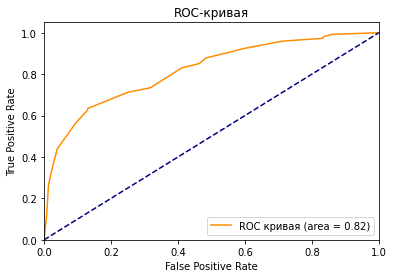

In [31]:
probabilities = model.predict_proba(features_valid)
probabilities = probabilities[:,1]

print('Значение F1-меры для лучшей модели решающего дерева:', f1_score(target_valid, predictions), '\n')
print('Значение AUC-ROC метрики для лучшей модели решающего дерева:', roc_auc_score(target_valid, probabilities), '\n')
print('Лучшая глубина:', best_depth)

fpr, tpr, treshold = roc_curve(target_valid, probabilities)
roc_auc = auc(fpr, tpr)

# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

Неплохой результат, но схожие показатели мы уже видели. Значение F1-меры слишком близко к критическому

**Модель: случайный лес**

In [32]:
%%time
best_depth = 0
best_n = 0
best_f1_score = 0
for depth in range(1,16):
    model = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=depth)
    model.fit(features_train_down, target_train_down)
    predictions = model.predict(features_valid)
    if f1_score(target_valid, predictions) > best_f1_score:
        best_f1_score = f1_score(target_valid, predictions)
        best_depth = depth

for n in range(1,101):
    model = RandomForestClassifier(random_state=12345, n_estimators=n, max_depth=best_depth)
    model.fit(features_train_down, target_train_down)
    predictions = model.predict(features_valid)
    if f1_score(target_valid, predictions) > best_f1_score:
        best_f1_score = f1_score(target_valid, predictions)
        best_n = n

CPU times: user 17.6 s, sys: 87.8 ms, total: 17.7 s
Wall time: 17.7 s


In [33]:
%%time 
model = RandomForestClassifier(random_state=12345, n_estimators=best_n, max_depth=best_depth)
model.fit(features_train_down, target_train_down)

predictions = model.predict(features_valid)

CPU times: user 200 ms, sys: 0 ns, total: 200 ms
Wall time: 202 ms


Значение F1-меры для лучшей модели случайного леса: 0.6218487394957984 

Значение AUC-ROC метрики для лучшей модели случайного леса: 0.8601065320998038 

Лучшая глубина: 7
Лучший размер леса: 44


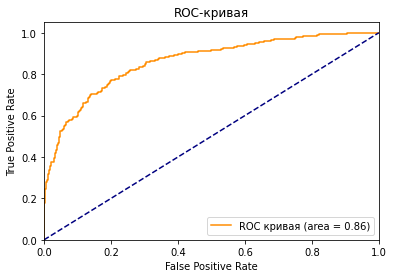

In [34]:
probabilities = model.predict_proba(features_valid)
probabilities = probabilities[:,1]

print('Значение F1-меры для лучшей модели случайного леса:', f1_score(target_valid, predictions), '\n')
print('Значение AUC-ROC метрики для лучшей модели случайного леса:', roc_auc_score(target_valid, probabilities), '\n')
print('Лучшая глубина:', best_depth)
print('Лучший размер леса:', best_n)

fpr, tpr, treshold = roc_curve(target_valid, probabilities)
roc_auc = auc(fpr, tpr)

# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

Случайный лес и downsampling-е имеет хорошие показатели AUC-ROC и F1. Но так как F1-мера модели случайного леса после upsampling-а имеет более высокие показатели, мы будем использовать именно её

**Вывод по методам балансировки классов:**
Ниболее успешной стала модель, полученная с помощью upsampling-а. Её показатель F1 составил: 0.6430517711171663, а показатель AUC-ROC: 0.8610578450612092. 
Гиперпораметры модели: max_depth = 5, n_estimators = 23

Стоит также добавить, что я проводил исследование для всех 3-х типов моделей следующего вида:
отказ от использования каких-либо методов sampling-а, а использование классического гиперпараметра class_weight=True. Положительных результатов это не дало, что в принципе логично, ведь для class_weight в нашем случае "разрыв" между положительными и отрицательными классами слишком велик

## Тестирование модели

***Тестируем нашу лучшую модель на тестовой выборке:***

In [35]:
model = RandomForestClassifier(random_state=12345, n_estimators=23, max_depth=5)
model.fit(features_train_up, target_train_up)
predictions = model.predict(features_test)
probabilities = model.predict_proba(features_test)
probabilities = probabilities[:,1]
print('Значение F1-меры лучшей модели', f1_score(target_test, predictions), '\n')
print('Значение AUC-ROC метрики лучшей модели:', roc_auc_score(target_test, probabilities))

Значение F1-меры лучшей модели 0.6162310866574965 

Значение AUC-ROC метрики лучшей модели: 0.8452191437474598


AUC-ROC модели составляет: 0.8452191437474598, что является хорошим результатом

F1-score больше 0.59, следовательно, модель нам подходит



В течение всего исследования, мы можем наблюдать, что всегда увеличиваются либо оба параметра (и AUC-ROC, и F1), либо оба уменьшаются. Это вполне закономерно, ведб оба параметра так или иначе связаны с тем, как хорошо модель разобралась в данных и научилась определять положительные и отрицательные классы

Финальная модель имеет высокий показатель AUC-ROC, что свидетельствует о том, что она сильно отличается от случайной модели, а значит, мы ее хорошо обучили

